In [88]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [89]:
class Detector:
    @staticmethod
    def get_mask(image, debug=True):
        original = image.copy()
        image_thresh, image_fixed, image = Detector.__normalize_image(image)

    @staticmethod
    def __normalize_image(diff_image, debug=True):
        image = cv.GaussianBlur(diff_image, (7, 7), 2)
        image = Detector.__unsharp_mask(image)
        gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
        adaptive_thresh = cv.adaptiveThreshold(gray_image, 125, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 201, 10)
        ret, fixed_thresh = cv.threshold(gray_image, 50, 140, cv.THRESH_BINARY)
        Detector.__auto_debug_plot(debug, image, 'Normalized Image')
        Detector.__auto_debug_plot(debug, gray_image, 'Gray Image', None, cmap='gray')
        Detector.__auto_debug_plot(debug, adaptive_thresh, 'Adaptive Threshold Image', None, cmap='gray')
        Detector.__auto_debug_plot(debug, fixed_thresh, 'Fixed Threshold Image', None, cmap='gray')
        return adaptive_thresh, fixed_thresh, image

    @staticmethod
    def __unsharp_mask(image, kernel_size=(3, 3), sigma=1.0, amount=70.0, threshold=30):
        blurred = cv.GaussianBlur(image, kernel_size, sigma)
        sharpened = float(amount + 1) * image - float(amount) * blurred
        sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
        sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
        sharpened = sharpened.round().astype(np.uint8)
        if threshold > 0:
            low_contrast_mask = np.absolute(image - blurred) < threshold
            np.copyto(sharpened, image, where=low_contrast_mask)
        return sharpened

    @staticmethod
    def __auto_debug_plot(debug, image, title=None, image_color=cv.COLOR_BGR2RGB, **kwargs):
        if debug:
            Detector.__debug_plot(image, title=title, image_color=image_color, **kwargs)

    @staticmethod
    def __debug_plot(image, title, *, image_color=cv.COLOR_BGR2RGB, **kwargs):
        plt.axis('off')
        plt.imshow(image if image_color is None else cv.cvtColor(image, image_color), **kwargs)
        if title:
            plt.title(title)
        plt.show()

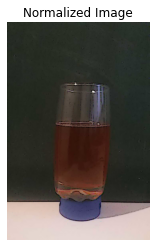

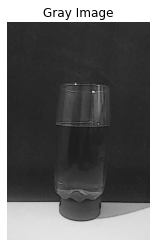

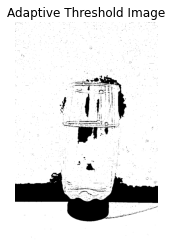

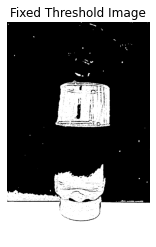

In [90]:
img = cv.imread('01_23_2022_13_09_05.jpg')
width, height, depth = img.shape
img = img[0:width - 180, 0: height]
Detector.get_mask(img)